In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes

# Read Data (Weight-Height)

In [52]:
data=pd.read_csv('weight-height.csv')

In [53]:
print(data.shape)

(10000, 3)


In [54]:
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


# Analyze Data

In [56]:
X=data['Height'].values
Y=data['Weight'].values

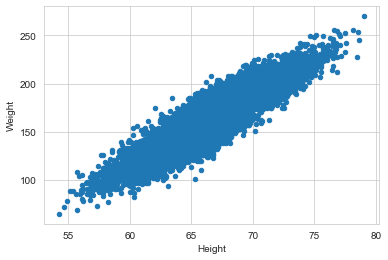

In [58]:
data.plot(kind='scatter',x='Height',y='Weight')
plt.show()

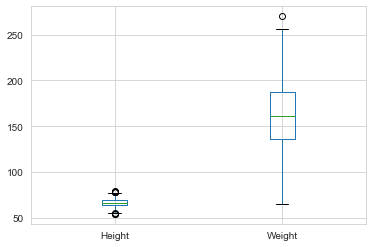

In [59]:
data.plot(kind='box')
plt.show()

In [60]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [61]:
Height=pd.DataFrame(data['Height'])
Weight=pd.DataFrame(data['Weight'])

In [62]:
Height

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [63]:
Weight

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


In [65]:
wh = pd.concat([Weight, Height], axis=1)

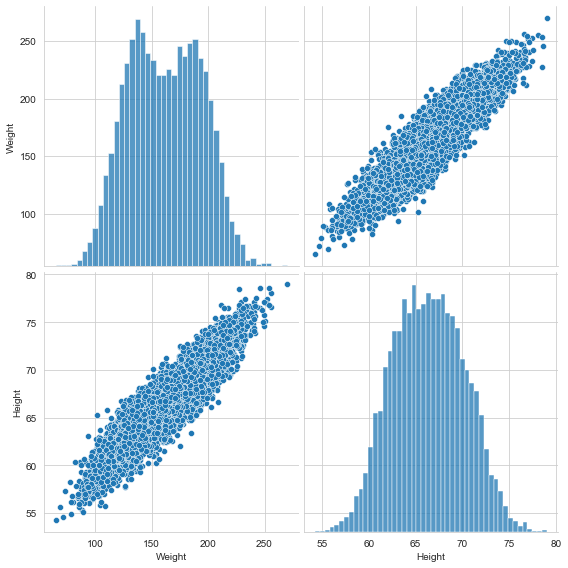

In [66]:
sns.pairplot(wh, height=4)

# Data Wrangling

In [111]:
data.isnull()

,Gender,Height,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


# Training & Testing Data

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [88]:
lm=linear_model.LinearRegression()

In [89]:
linmod=lm.fit(Weight,Height)

In [90]:
linmod.coef_

array([[0.11081279]])

In [91]:
linmod.intercept_

array([48.47790261])

In [92]:
linmod.score(Weight,Height)

0.8551742120609958

In [97]:
X=([105,95,67])
X=pd.DataFrame(X)
Y=linmod.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y],axis=1,keys=['Weight_new','Height_pred'])
df

,Weight_new,Height_pred
,0,0
0,105,60.113246
1,95,59.005118
2,67,55.902360


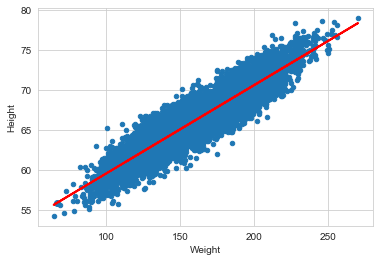

In [106]:
data.plot(kind='scatter',x='Weight',y='Height')
plt.plot(Weight,linmod.predict(Weight),color='red',linewidth=2)
plt.scatter(X,Y)
plt.show()